In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import (
    datasets, metrics, model_selection as skms, linear_model
)

In [57]:
dataset = datasets.load_diabetes()

In [58]:
scores = []
for r in range(10):
    (train_ftrs, test_ftrs, train_trgt, test_trgt) = skms.train_test_split(dataset.data, dataset.target, test_size=0.25)
    model = linear_model.LinearRegression()
    fit = model.fit(train_ftrs, train_trgt)
    predict = fit.predict(test_ftrs)
    score = np.sqrt(metrics.mean_squared_error(test_trgt, predict))
    scores.append(score)
scores = sorted(scores)
dataframe = (pd.DataFrame({"RMSE": scores}))
dataframe.index.name = "Repeat"
dataframe.T


Repeat,0,1,2,3,4,5,6,7,8,9
RMSE,53.500776,54.967917,55.141974,56.455374,57.008706,58.83773,59.208963,59.297878,59.312154,60.121788


Text(16.97222222222222, 0.5, 'RMSE')

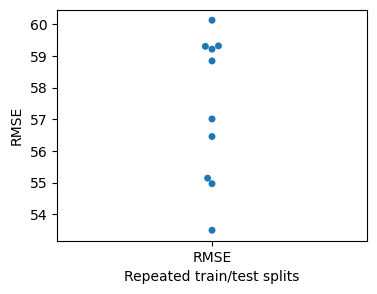

In [59]:
ax = plt.figure(figsize=(4, 3)).gca()
sns.swarmplot(data=dataframe, ax=ax)
ax.set_xlabel("Repeated train/test splits")
ax.set_ylabel("RMSE")

In [60]:
display(dataframe.describe().T)

,count,mean,std,min,25%,50%,75%,max
RMSE,10.0,57.385326,2.291694,53.500776,55.470324,57.923218,59.275649,60.121788


In [61]:
def repeated_train_test_split(model, dataset):
    (train_ftrs, test_ftrs, train_trgt, test_trgt) = skms.train_test_split(dataset.data, dataset.target, test_size=0.25)
    fit = model.fit(train_ftrs, train_trgt)
    predict = fit.predict(test_ftrs)
    score = np.sqrt(metrics.mean_squared_error(test_trgt, predict))
    return score
model = linear_model.LinearRegression()
scores = [repeated_train_test_split(model, dataset) for i in range(10)]
scores = sorted(scores)
dataframe = pd.DataFrame(
    {
        "RMSE": scores
    }
)
dataframe.index.name = "Repeat TTS"
dataframe.T

Repeat TTS,0,1,2,3,4,5,6,7,8,9
RMSE,47.030239,49.571299,50.747977,51.51528,53.274277,55.145493,55.312585,56.281088,56.832451,59.81689


Text(16.97222222222222, 0.5, 'RMSE')

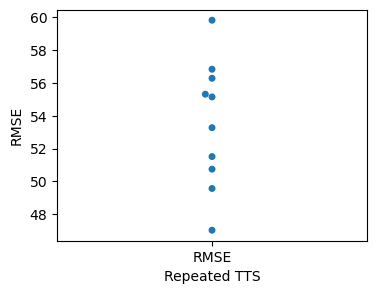

In [62]:
# plotting the above
ax = plt.figure(figsize=(4, 3)).gca()
sns.swarmplot(data=dataframe, ax=ax)
ax.set_xlabel("Repeated TTS")
ax.set_ylabel("RMSE")

In [64]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
RMSE,10.0,53.552758,3.852333,47.030239,50.939803,54.209885,56.038962,59.81689
